# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("Agg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(15, 15)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                  315
           取引回数                   15
           開始日時  2021-03-31 19:48:12
           終了日時  2021-03-31 20:04:14
        取引時間[H]      0 days 00:16:02
      取引単位[BTC]               0.0001
  利確しきい値[JPY]                 1500
損切りマージン[JPY]                 1500
-------------------  -------------------


トレード結果
-----------  ------
開始[JPY]     14792
終了[JPY]     14790
利益[JPY]        -2
開始[BTC]    0.0024
終了[BTC]    0.0024
利益[BTC]         0
開始[TOTAL]   30123
終了[TOTAL]   30133
利益[TOTAL]      10
-----------  ------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
       10          -3.255      13.255


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2021-03-31 19:48:12,sell,6393103.0,buy,6388300.0,4803.0
2021-03-31 19:49:06,buy,6385030.0,sell,6382135.0,-2895.0
2021-03-31 19:49:10,sell,6385004.0,buy,6382445.0,2559.0
2021-03-31 19:51:41,buy,6384001.0,sell,6383615.0,-386.0
2021-03-31 19:51:57,sell,6384000.0,buy,6380900.0,3100.0
2021-03-31 19:52:22,buy,6384000.0,sell,6386181.0,2181.0
2021-03-31 19:53:15,sell,6389746.0,buy,6388209.0,1537.0
2021-03-31 19:53:34,buy,6390385.0,sell,6391251.0,866.0
2021-03-31 19:53:44,sell,6390449.0,buy,6390294.0,155.0


In [12]:
round(sum(profit_df.profit), 3)

15878.0

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(315, 315)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1.0, 'exchange2 bid/exchange1 ask')

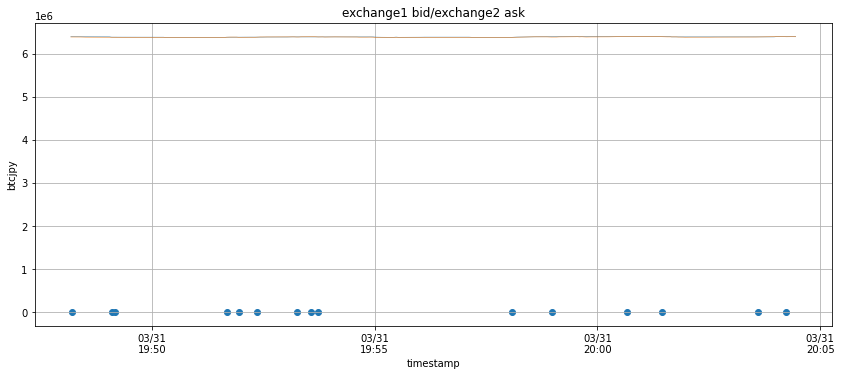

In [16]:
fig1

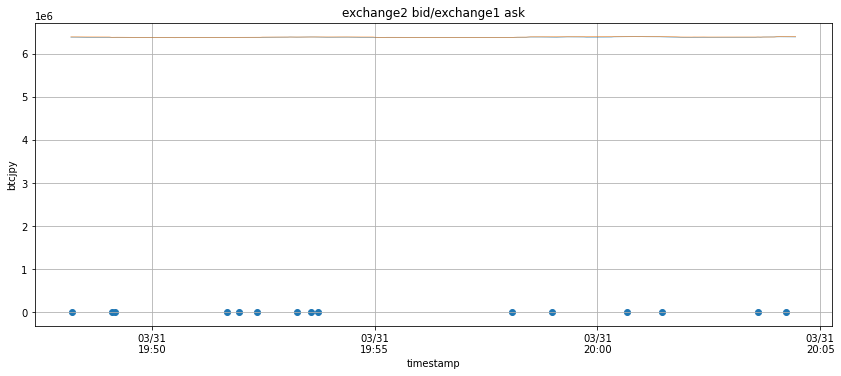

In [17]:
fig2